In [16]:
import numpy as np
from numpy.typing import NDArray
from typing import Optional
from matplotlib import pyplot as plt
from skimage import io, color
from scipy import fft
from abc import abstractmethod

Klasa Abstrakcyjna - CompressionTransform:
Klasa abstrakcyjna zawierająca dwie abstrakcyjne metody forward i backward.

In [17]:
class CompressionTransform:
    @abstractmethod
    def forward(self, variables: NDArray) -> NDArray:
        ...

    @abstractmethod
    def backward(self, variables: NDArray) -> NDArray:
        ...

Klasa - FourierTransform2DGray:

Implementuje konkretną transformację Fouriera dla obrazów w odcieniach szarości.
Metoda forward wykonuje 2D FFT (transformatę Fouriera) na obrazie.
Metoda backward wykonuje 2D IFFT (odwrotną transformatę Fouriera) na zmiennych.

In [18]:
# Transformacja Fourier'a dla obrazów szarych
class FourierTransform2DGray(CompressionTransform):
    def forward(self, variables: NDArray) -> NDArray:
        return np.fft.fft2(variables)

    def backward(self, variables: NDArray) -> NDArray:
        return np.abs(np.fft.ifft2(variables))

Klasa - FourierTransform2DColor:

Implementuje konkretną transformację Fouriera dla obrazów kolorowych.
Metoda forward wykonuje 2D FFT na obrazie z uwzględnieniem osi (0, 1).
Metoda backward wykonuje 2D IFFT na zmiennych z uwzględnieniem osi (0, 1).
Funkcja - compress_and_decompress:

Przeprowadza kompresję obrazu używając zadanego transformatora i współczynnika kompresji.
Wartości pikseli przekształconego obrazu są sortowane według magnitudy, a następnie stosowany jest próg w celu wybrania istotnych współczynników.
Zastosowane są indeksy dla współczynników powyżej progu, a następnie obliczany jest zdekompresowany obraz.
Funkcje - display_gray_images i display_color_images:

Służą do wyświetlania oryginalnych i skompresowanych obrazów w odcieniach szarości oraz kolorowych, odpowiednio.
Dla obrazów kolorowych, zakres wartości pikseli jest dostosowywany do przedziału [0, 255].

In [19]:
# Transformacja Fourier'a dla obrazów kolorowych
class FourierTransform2DColor(CompressionTransform):
    def forward(self, variables: NDArray) -> NDArray:
        return fft.fft2(variables, axes=(0, 1))

    def backward(self, variables: NDArray) -> NDArray:
        return np.abs(fft.ifft2(variables, axes=(0, 1)))

def compress_and_decompress(image: NDArray, transform: CompressionTransform, compression: float) -> NDArray:
    transformed = transform.forward(image)
    coefficients = np.sort(np.abs(transformed.reshape(-1)))

    threshold = coefficients[int(compression * len(coefficients))]
    indices = np.abs(transformed) > threshold

    decompressed = transformed * indices
    return transform.backward(decompressed)

def display_gray_images(original: NDArray, compressed_images: list, compression_ratios: list):
    plt.figure(figsize=(15, 8))


    plt.subplot(1, len(compressed_images) + 1, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Oryginalny Obraz Szary')
    plt.axis('off')

    for i, (compressed, cr) in enumerate(zip(compressed_images, compression_ratios), start=2):
        plt.subplot(1, len(compressed_images) + 1, i)
        plt.imshow(compressed, cmap='gray')
        plt.title(f'Skompresowany CR={cr}')
        plt.axis('off')

    plt.show()

def display_color_images(original: NDArray, compressed_images: list, compression_ratios: list):
    plt.figure(figsize=(15, 8))


    plt.subplot(1, len(compressed_images) + 1, 1)
    plt.imshow(original)
    plt.title('Oryginalny Obraz Kolorowy')
    plt.axis('off')

    for i, (compressed, cr) in enumerate(zip(compressed_images, compression_ratios), start=2):

        compressed = np.clip(compressed, 0, 255).astype(np.uint8)

        plt.subplot(1, len(compressed_images) + 1, i)
        plt.imshow(compressed)
        plt.title(f'Skompresowany CR={cr}')
        plt.axis('off')

    plt.show()


Zastosowanie do Obrazów:

Obrazy są wczytywane z podanych adresów URL, a następnie przekształcane na odcienie szarości (dla obrazów szarych).
Dla różnych wartości współczynnika kompresji (CR), przeprowadzane są operacje kompresji i dekompresji.
Wyniki są wyświetlane przy użyciu matplotlib.

In [20]:
# Wczytywanie obrazów szarych
image_path_gray = "https://upload.wikimedia.org/wikipedia/commons/thumb/7/70/Front_view_of_a_resting_Canis_lupus_ssp.jpg/800px-Front_view_of_a_resting_Canis_lupus_ssp.jpg"
image_gray = io.imread(image_path_gray)

In [21]:
image_gray = color.rgb2gray(image_gray)

In [22]:
# Kompresja dla różnych wartości CR
compression_ratios_gray = [0.90, 0.95, 0.99]
compressed_images_gray = [compress_and_decompress(image_gray, transform=FourierTransform2DGray(), compression=cr) for cr in compression_ratios_gray]

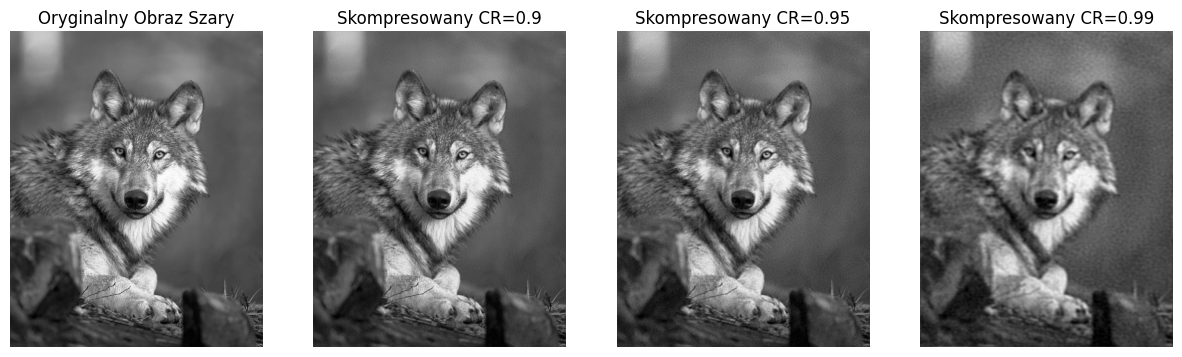

In [23]:
# Wyświetlanie obrazów szarych
display_gray_images(image_gray, compressed_images_gray, compression_ratios_gray)

In [24]:
# Wczytywanie obrazów kolorowych
image_path_color = "https://upload.wikimedia.org/wikipedia/commons/thumb/7/70/Front_view_of_a_resting_Canis_lupus_ssp.jpg/800px-Front_view_of_a_resting_Canis_lupus_ssp.jpg"
image_color = io.imread(image_path_color)


In [25]:
# Kompresja dla różnych wartości CR
compression_ratios_color = [0.90, 0.95, 0.99]
compressed_images_color = [compress_and_decompress(image_color, transform=FourierTransform2DColor(), compression=cr) for cr in compression_ratios_color]

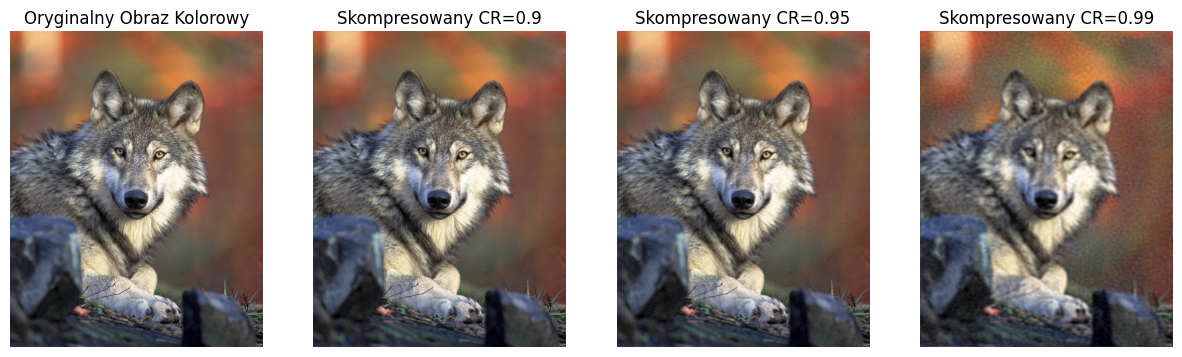

In [26]:
# Wyświetlanie obrazów kolorowych
display_color_images(image_color, compressed_images_color, compression_ratios_color)

Wniosek: Kod ilustruje proces kompresji obrazów przy użyciu transformaty Fouriera, zarówno dla obrazów w odcieniach szarości, jak i kolorowych, prezentując różne stopnie kompresji.